# 機器學習百日馬拉松期中考 - Enron Fraud Dataset 安隆公司詐欺案資料集

https://www.kaggle.com/c/ml100marathon

# 作業1
* 參考範例，將鐵達尼的艙位代碼( 'Cabin' )欄位使用特徵雜湊 / 標籤編碼 / 目標均值編碼三種轉換後，  
與其他數值型欄位一起預估生存機率

In [39]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy, time
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

df_temp = pd.DataFrame()

data_path = 'mid_term_exam/'
df_train_ori = pd.read_csv(data_path + 'train_data.csv')
df_test_ori = pd.read_csv(data_path + 'test_features.csv')

In [40]:
df_train_ori

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
5,HIRKO JOSEPH,NaN,10259.0,NaN,NaN,joe.hirko@enron.com,30766064.0,77978.0,NaN,NaN,...,NaN,2856.0,True,NaN,NaN,NaN,NaN,NaN,91093.0,30766064.0
6,YEAGER F SCOTT,NaN,NaN,NaN,NaN,scott.yeager@enron.com,8308552.0,53947.0,NaN,NaN,...,NaN,147950.0,True,3576206.0,NaN,158403.0,NaN,NaN,360300.0,11884758.0
7,COLWELL WESLEY,1200000.0,27610.0,-144062.0,NaN,wes.colwell@enron.com,NaN,16514.0,40.0,240.0,...,NaN,101740.0,True,698242.0,NaN,288542.0,1132.0,1758.0,1490344.0,698242.0
8,LAY KENNETH L,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,...,3600000.0,10359729.0,True,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0
9,GLISAN JR BEN F,600000.0,NaN,NaN,NaN,ben.glisan@enron.com,384728.0,125978.0,16.0,52.0,...,71023.0,200308.0,True,393818.0,NaN,274975.0,874.0,873.0,1272284.0,778546.0


In [41]:
df_train_ori.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,6.100000e+01,2.800000e+01,3.400000e+01,13.000000,8.100000e+01,73.000000,65.000000,65.000000,65.000000,2.000000e+00,4.900000e+01,6.900000e+01,8.200000e+01,10.000000,7.300000e+01,65.000000,65.000000,9.600000e+01,9.800000e+01
mean,1.147436e+06,6.344374e+05,-4.625664e+05,89397.846154,2.985081e+06,51040.547945,711.323077,64.800000,40.092308,4.096250e+07,7.926171e+05,4.471774e+05,1.294855e+06,-221885.700000,2.739025e+05,1111.369231,2156.061538,2.590977e+06,3.527136e+06
std,1.505189e+06,8.603646e+05,8.095392e+05,41143.391399,6.004174e+06,47596.682104,2074.497628,91.863214,88.901407,5.736404e+07,9.504645e+05,1.341564e+06,2.498335e+06,205191.374121,1.716647e+05,1165.852016,2811.676718,1.056645e+07,7.182997e+06
min,7.000000e+04,-1.025000e+05,-3.504386e+06,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,4.000000e+05,7.102300e+04,2.000000e+00,4.409300e+04,-560222.000000,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.500000e+05,7.656750e+04,-5.527032e+05,101250.000000,4.004780e+05,18834.000000,19.000000,10.000000,0.000000,2.068125e+07,2.750000e+05,9.720000e+02,2.689220e+05,-389621.750000,2.061210e+05,178.000000,517.000000,3.024025e+05,4.211518e+05
50%,7.500000e+05,1.951900e+05,-1.175340e+05,108579.000000,8.500100e+05,41953.000000,45.000000,28.000000,7.000000,4.096250e+07,4.221580e+05,5.238200e+04,4.628225e+05,-139856.500000,2.516540e+05,599.000000,1088.000000,1.106740e+06,9.979710e+05
75%,1.000000e+06,8.342052e+05,-2.708325e+04,112492.000000,2.165172e+06,59175.000000,215.000000,88.000000,27.000000,6.124375e+07,8.318090e+05,3.620960e+05,9.664905e+05,-77953.250000,2.885890e+05,1902.000000,2649.000000,1.985668e+06,2.493616e+06
max,8.000000e+06,2.964506e+06,-1.042000e+03,125034.000000,3.434838e+07,228763.000000,14368.000000,528.000000,411.000000,8.152500e+07,5.145434e+06,1.035973e+07,1.476169e+07,44093.000000,1.111258e+06,4527.000000,15149.000000,1.035598e+08,4.911008e+07


In [42]:
df_train_ori.dtypes

name                          object
bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
email_address                 object
exercised_stock_options      float64
expenses                     float64
from_messages                float64
from_poi_to_this_person      float64
from_this_person_to_poi      float64
loan_advances                float64
long_term_incentive          float64
other                        float64
poi                             bool
restricted_stock             float64
restricted_stock_deferred    float64
salary                       float64
shared_receipt_with_poi      float64
to_messages                  float64
total_payments               float64
total_stock_value            float64
dtype: object

In [43]:
train_Y = df_train_ori['poi']
train_num = train_Y.shape[0]

ids = df_test_ori['name']
df_train = df_train_ori.drop(['name', 'email_address', 'poi'] , axis=1)
df_test = df_test_ori.drop(['name', 'email_address'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [153]:
df_temp=df_train_ori.copy()
target_corr = df_temp.corr()['poi']

print(f'TARGET與所有欄位之間相關係數:\n{target_corr.sort_values(ascending=False)}')

TARGET與所有欄位之間相關係數:
loan_advances                1.000000
poi                          1.000000
exercised_stock_options      0.591972
total_stock_value            0.443098
salary                       0.371917
total_payments               0.271335
restricted_stock             0.261102
bonus                        0.242170
long_term_incentive          0.227805
other                        0.225619
expenses                     0.136386
from_poi_to_this_person      0.127932
shared_receipt_with_poi      0.120467
to_messages                 -0.023047
from_this_person_to_poi     -0.096864
from_messages               -0.126760
deferred_income             -0.224654
deferral_payments           -0.251548
director_fees                     NaN
restricted_stock_deferred         NaN
Name: poi, dtype: float64


In [142]:
import matplotlib.pyplot as plt
%matplotlib inline

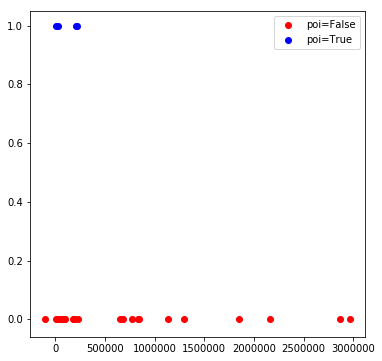

In [148]:
plt.figure(figsize=(6,6))
# plt.scatter: Create a scatter plot with varying marker point size and color.
plt.scatter(
    df_temp[df_temp['poi'] == 0]['deferral_payments'], 
    df_temp[df_temp['poi'] == False]['poi'], 
    marker='o', c='red', label='poi=False'
)
plt.scatter(
    df_temp[df_temp['poi'] == 1]['deferral_payments'],
    df_temp[df_temp['poi'] == True]['poi'], 
    marker='o', c='blue', label='poi=True'
)
plt.legend()

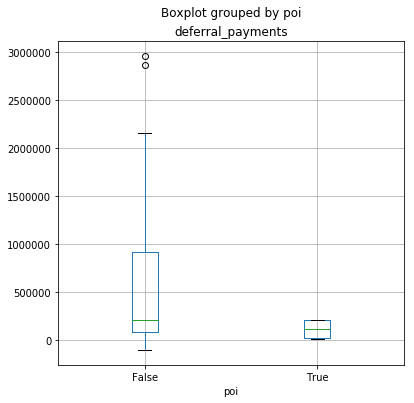

In [147]:
# column: Column name or list of names
# by: str or array-like
# showfliers: Show the outliers beyond the caps
# figsize : A tuple (width, height) in inches. The size of the figure to create in matplotlib
# vert: bool. If True (default), makes the boxes vertical. If False, everything is drawn horizontally.

df_temp.boxplot(column='deferral_payments', by = 'poi', showfliers=True, figsize=(6, 6), vert=True)


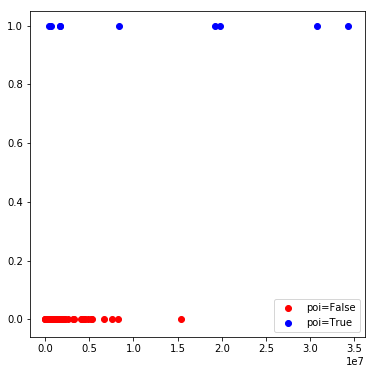

In [149]:
plt.figure(figsize=(6,6))
# plt.scatter: Create a scatter plot with varying marker point size and color.
plt.scatter(
    df_temp[df_temp['poi'] == 0]['exercised_stock_options'], 
    df_temp[df_temp['poi'] == False]['poi'], 
    marker='o', c='red', label='poi=False'
)
plt.scatter(
    df_temp[df_temp['poi'] == 1]['exercised_stock_options'],
    df_temp[df_temp['poi'] == True]['poi'], 
    marker='o', c='blue', label='poi=True'
)
plt.legend()

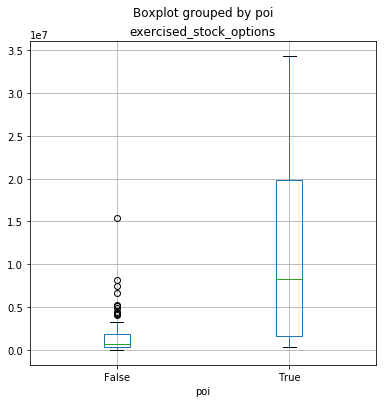

In [150]:
# column: Column name or list of names
# by: str or array-like
# showfliers: Show the outliers beyond the caps
# figsize : A tuple (width, height) in inches. The size of the figure to create in matplotlib
# vert: bool. If True (default), makes the boxes vertical. If False, everything is drawn horizontally.

df_temp.boxplot(column='exercised_stock_options', by = 'poi', showfliers=True, figsize=(6, 6), vert=True)


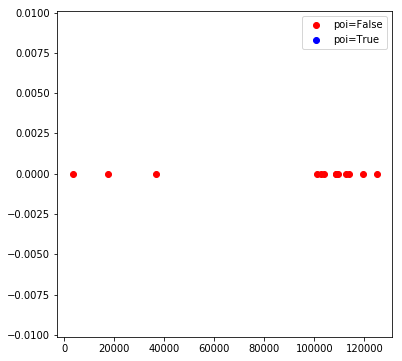

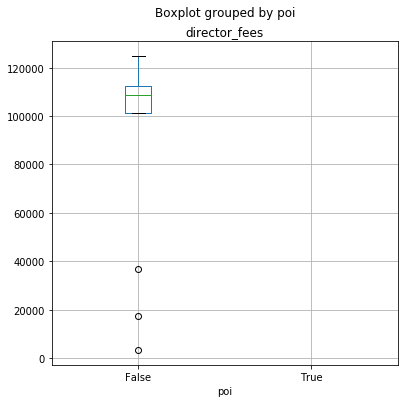

In [151]:
plt.figure(figsize=(6,6))
# plt.scatter: Create a scatter plot with varying marker point size and color.
plt.scatter(
    df_temp[df_temp['poi'] == 0]['director_fees'], 
    df_temp[df_temp['poi'] == False]['poi'], 
    marker='o', c='red', label='poi=False'
)
plt.scatter(
    df_temp[df_temp['poi'] == 1]['director_fees'],
    df_temp[df_temp['poi'] == True]['poi'], 
    marker='o', c='blue', label='poi=True'
)
plt.legend()

df_temp.boxplot(column='director_fees', by = 'poi', showfliers=True, figsize=(6, 6), vert=True)

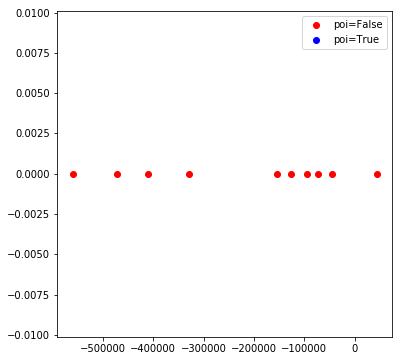

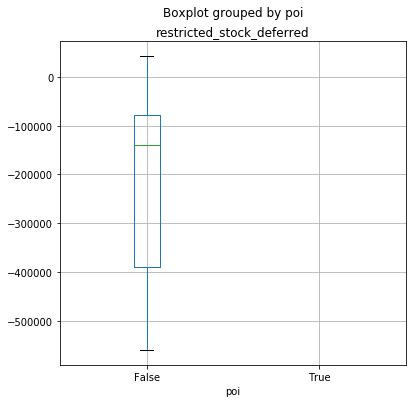

In [152]:
plt.figure(figsize=(6,6))
# plt.scatter: Create a scatter plot with varying marker point size and color.
plt.scatter(
    df_temp[df_temp['poi'] == 0]['restricted_stock_deferred'], 
    df_temp[df_temp['poi'] == False]['poi'], 
    marker='o', c='red', label='poi=False'
)
plt.scatter(
    df_temp[df_temp['poi'] == 1]['restricted_stock_deferred'],
    df_temp[df_temp['poi'] == True]['poi'], 
    marker='o', c='blue', label='poi=True'
)
plt.legend()

df_temp.boxplot(column='restricted_stock_deferred', by = 'poi', showfliers=True, figsize=(6, 6), vert=True)

------

# 各種測試

------

------

## 測試 1:  標籤編碼 + 邏輯斯迴歸

------

In [101]:

df_temp = pd.DataFrame()
for c in df.columns:
    df_temp[c] = LabelEncoder().fit_transform(df[c])
train_X = df_temp[:train_num]

print(f'train_X.shape={train_X.shape}')

estimator = LogisticRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())
df_temp.head()

train_X.shape=(113, 19)
0.7798418972332016


C:\Users\erwin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erwin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erwin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erwin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erwin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,29,41,1,76,97,46,6,25,4,4,43,57,85,75,84,44,37,34,118
1,37,112,69,95,96,30,38,37,25,93,46,42,92,94,92,62,75,119,120
2,2,111,41,96,60,23,21,8,12,94,71,84,62,95,24,11,9,89,89
3,17,110,75,97,109,84,86,57,41,95,32,81,68,96,30,105,105,99,53
4,24,109,18,98,101,39,41,49,22,96,23,8,6,97,37,65,63,81,6


In [46]:
df_temp.fillna(0)
train_X = df_temp[:train_num]
estimator = LogisticRegression()

estimator.fit(train_X, train_Y)

C:\Users\erwin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [76]:
df_temp.isna().describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146


In [68]:
# Make predictions
# Make sure to select the second column only
estimator_pred = estimator.predict_proba(df_temp[train_num:])[:, 1]

In [69]:
estimator_pred

array([4.28577104e-01, 2.95529578e-01, 6.63379297e-01, 2.10519222e-02,
       8.38390897e-01, 3.68164416e-01, 9.63621305e-01, 1.64861789e-03,
       3.37283242e-01, 5.35758050e-02, 9.04383920e-03, 3.94987067e-02,
       1.14299322e-03, 1.55325178e-01, 4.14903836e-01, 1.19232813e-04,
       9.47095937e-02, 2.32783491e-02, 5.05798067e-02, 2.41220429e-04,
       5.33768094e-02, 2.78316958e-02, 9.98425997e-02, 1.54021124e-02,
       5.35109240e-02, 7.80734870e-02, 1.12348262e-03, 1.42195762e-01,
       1.19953719e-01, 1.39585365e-02, 1.00194151e-02, 6.63598508e-03,
       1.06800796e-02])

In [70]:
estimator_pred.shape

(33,)

In [72]:
# Submit df_test_ori['name'] dataframe
submit = df_test_ori[['name']]
print(f'submit.shape={submit.shape}')
submit.describe()
submit.head()

submit.shape=(33, 1)


,name
0,BELDEN TIMOTHY N
1,BOWEN JR RAYMOND M
2,HANNON KEVIN P
3,DELAINEY DAVID W
4,CAUSEY RICHARD A


In [73]:
print(f'submit.size={submit.size}, len(estimator_pred)={len(estimator_pred)}')
submit['poi'] = estimator_pred

submit.head()

submit.size=33, len(estimator_pred)=33


C:\Users\erwin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,name,poi
0,BELDEN TIMOTHY N,0.428577
1,BOWEN JR RAYMOND M,0.295530
2,HANNON KEVIN P,0.663379
3,DELAINEY DAVID W,0.021052
4,CAUSEY RICHARD A,0.838391


In [74]:
submit.describe()

,poi
count,33.000000
mean,0.163414
std,0.248858
min,0.000119
25%,0.010680
50%,0.053377
75%,0.155325
max,0.963621


In [75]:
submit.to_csv('./Day_049_submission_by_erwin.csv', sep=',', encoding='utf-8', index=False)

------

## 測試 2:  MinMax 編碼 + 邏輯斯迴歸

------

In [125]:

df_no_na = df.copy()
df_no_na.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,8.200000e+01,3.900000e+01,4.900000e+01,1.700000e+01,1.020000e+02,9.500000e+01,86.000000,86.000000,86.000000,4.000000e+00,6.600000e+01,9.300000e+01,1.100000e+02,1.800000e+01,9.500000e+01,86.000000,86.000000,1.250000e+02,1.260000e+02
mean,2.374235e+06,1.642674e+06,-1.140475e+06,1.668049e+05,5.987054e+06,1.087289e+05,608.790698,64.895349,41.232558,4.196250e+07,1.470361e+06,9.190650e+05,2.321741e+06,1.664106e+05,5.621943e+05,1176.465116,2073.860465,5.081526e+06,6.773957e+06
std,1.071333e+07,5.161930e+06,4.025406e+06,3.198914e+05,3.106201e+07,5.335348e+05,1841.033949,86.979244,100.073111,4.708321e+07,5.942759e+06,4.589253e+06,1.251828e+07,4.201494e+06,2.716369e+06,1178.317641,2582.700981,2.906172e+07,3.895777e+07
min,7.000000e+04,-1.025000e+05,-2.799289e+07,3.285000e+03,3.285000e+03,1.480000e+02,12.000000,0.000000,0.000000,4.000000e+05,6.922300e+04,2.000000e+00,-2.604490e+06,-7.576788e+06,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.312500e+05,8.157300e+04,-6.948620e+05,9.878400e+04,5.278862e+05,2.261400e+04,22.750000,10.000000,1.000000,1.600000e+06,2.812500e+05,1.215000e+03,2.540180e+05,-3.896218e+05,2.118160e+05,249.750000,541.250000,3.944750e+05,4.945102e+05
50%,7.693750e+05,2.274490e+05,-1.597920e+05,1.085790e+05,1.310814e+06,4.695000e+04,41.000000,35.000000,8.000000,4.176250e+07,4.420350e+05,5.238200e+04,4.517400e+05,-1.469750e+05,2.599960e+05,740.500000,1211.000000,1.101393e+06,1.102872e+06
75%,1.200000e+06,1.002672e+06,-3.834600e+04,1.137840e+05,2.547724e+06,7.995250e+04,145.500000,72.250000,24.750000,8.212500e+07,9.386720e+05,3.620960e+05,1.002370e+06,-7.500975e+04,3.121170e+05,1888.250000,2634.750000,2.093263e+06,2.949847e+06
max,9.734362e+07,3.208340e+07,-8.330000e+02,1.398517e+06,3.117640e+08,5.235198e+06,14368.000000,528.000000,609.000000,8.392500e+07,4.852193e+07,4.266759e+07,1.303223e+08,1.545629e+07,2.670423e+07,5521.000000,15149.000000,3.098866e+08,4.345095e+08


In [126]:
df_no_na = df.fillna(0)

In [127]:
df_temp = pd.DataFrame()

df_temp = MinMaxScaler().fit_transform(df_no_na)
train_X = df_temp[:train_num]

print(f'df_temp.shape={df_temp.shape}')

pd.DataFrame(df_temp).describe()

df_temp.shape=(146, 19)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.013699,0.016818,0.986326,0.013888,0.013416,0.013514,0.024958,0.072398,0.039881,0.013699,0.013699,0.013721,0.032753,0.329843,0.013699,0.125518,0.080638,0.014039,0.013554
std,0.083149,0.085172,0.084959,0.085129,0.083622,0.082655,0.100310,0.139964,0.130178,0.114976,0.083386,0.086303,0.082000,0.062504,0.082518,0.194343,0.146991,0.086917,0.083412
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.003185,0.998645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019654,0.328952,0.000000,0.000000,0.000000,0.000303,0.000628
50%,0.003082,0.003185,1.000000,0.000000,0.001951,0.003855,0.001148,0.004735,0.000000,0.000000,0.000000,0.000022,0.022306,0.328952,0.007886,0.018565,0.019077,0.003038,0.002324
75%,0.008218,0.003486,1.000000,0.000000,0.005498,0.010265,0.003567,0.077178,0.022578,0.000000,0.007730,0.003530,0.025721,0.328952,0.010143,0.161837,0.104677,0.006352,0.005440
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [128]:
pd.DataFrame(df_temp).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.017978,0.003185,0.874812,0.0,0.063491,0.008968,0.001253,0.079545,0.006568,0.0,0.033325,0.004098,0.040269,0.328952,0.015752,0.156493,0.059740,0.001630,0.051977
1,0.057528,0.003185,1.000000,0.0,0.061745,0.005604,0.007517,0.166667,0.049261,0.0,0.039570,0.000518,0.071078,0.328952,0.041614,0.369861,0.239422,0.028019,0.060149
2,0.002055,0.003185,0.999851,0.0,0.005210,0.004371,0.002714,0.024621,0.022989,0.0,0.000000,0.036874,0.026133,0.328952,0.007933,0.016483,0.014852,0.006467,0.005840
3,0.008218,0.003185,1.000000,0.0,0.000000,0.022565,0.000000,0.000000,0.000000,0.0,0.012421,0.021269,0.027004,0.328952,0.008400,0.000000,0.000000,0.008560,0.002368
4,0.012841,0.003185,0.990623,0.0,0.000000,0.006842,0.010022,0.376894,0.041051,0.0,0.007735,0.000011,0.020542,0.328952,0.008994,0.396305,0.171496,0.005290,0.000391


In [132]:
estimator = LogisticRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())


0.8853754940711462


C:\Users\erwin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erwin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erwin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erwin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erwin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [133]:
# Make predictions
# Make sure to select the second column only
estimator = LogisticRegression()

estimator.fit(train_X, train_Y)


estimator_pred = estimator.predict_proba(df_temp[train_num:])[:, 1]
print(f'estimator_pred.shape={estimator_pred.shape}')
estimator_pred

estimator_pred.shape=(33,)


C:\Users\erwin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.19831698, 0.14078417, 0.13954971, 0.10157593, 0.13431053,
       0.12545543, 0.19655674, 0.11377926, 0.13870884, 0.11576314,
       0.12335615, 0.12108393, 0.12155143, 0.1139225 , 0.13805574,
       0.11394198, 0.11791983, 0.1148675 , 0.11523578, 0.11413063,
       0.73669663, 0.13111485, 0.12357654, 0.11414045, 0.11428768,
       0.11883073, 0.09940558, 0.11421975, 0.12795406, 0.13530153,
       0.11447466, 0.11470639, 0.13938548])

In [134]:
pd.DataFrame(estimator_pred).describe()

,0
count,33.000000
mean,0.144938
std,0.108322
min,0.099406
25%,0.114288
50%,0.121084
75%,0.135302
max,0.736697


In [115]:
# Submit df_test_ori['name'] dataframe
submit = df_test_ori[['name']]
print(f'submit.shape={submit.shape}')

submit.shape=(33, 1)


In [116]:
print(f'submit.size={submit.size}, len(estimator_pred)={len(estimator_pred)}')
submit['poi'] = estimator_pred

submit.head()

submit.size=33, len(estimator_pred)=33


C:\Users\erwin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,name,poi
0,BELDEN TIMOTHY N,0.198317
1,BOWEN JR RAYMOND M,0.140784
2,HANNON KEVIN P,0.139550
3,DELAINEY DAVID W,0.101576
4,CAUSEY RICHARD A,0.134311


In [117]:
submit.describe()

,poi
count,33.000000
mean,0.144938
std,0.108322
min,0.099406
25%,0.114288
50%,0.121084
75%,0.135302
max,0.736697


In [118]:
submit.to_csv('./Day_049_submission_by_minmaxscaler_logistic.csv', sep=',', encoding='utf-8', index=False)

------

## 測試 3:  MinMax 編碼 + 邏輯斯迴歸

------

In [201]:
from sklearn.preprocessing import MaxAbsScaler

In [202]:
df_no_na = df.copy()
df_no_na.describe()
df_no_na = df.fillna(0)

In [209]:
# Try to use weight_array
df_temp=df_train_ori.copy()
target_corr = df_temp.corr()['poi']
weight_array = abs(target_corr.drop(['poi'] , axis=0).fillna(1.0).values)
weight_array

array([0.24217011, 0.25154782, 0.22465411, 1.        , 0.59197208,
       0.13638646, 0.12675964, 0.12793207, 0.0968637 , 1.        ,
       0.22780459, 0.22561909, 0.26110188, 1.        , 0.37191723,
       0.12046717, 0.02304725, 0.2713348 , 0.44309847])

In [204]:
df_temp = pd.DataFrame()

df_temp = MaxAbsScaler().fit_transform(df_no_na)
train_X = df_temp[:train_num]

print(f'df_temp.shape={df_temp.shape}')

pd.DataFrame(df_temp).describe()

df_temp.shape=(146, 19)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.013699,0.013677,-0.013674,0.013888,0.013416,0.013514,0.024958,0.072398,0.039881,0.013699,0.013699,0.013721,0.013423,0.001327,0.013699,0.125518,0.080638,0.014039,0.013454
std,0.083149,0.085444,0.084959,0.085129,0.083622,0.082655,0.100310,0.139964,0.130178,0.114976,0.083386,0.086303,0.083638,0.093144,0.082518,0.194343,0.146991,0.086917,0.083420
min,0.000000,-0.003195,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.019985,-0.490207,0.000000,0.000000,0.000000,0.000000,-0.000101
25%,0.000000,0.000000,-0.001355,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000062,0.000000,0.000000,0.000000,0.000000,0.000303,0.000527
50%,0.003082,0.000000,0.000000,0.000000,0.001951,0.003855,0.001148,0.004735,0.000000,0.000000,0.000000,0.000022,0.002766,0.000000,0.007886,0.018565,0.019077,0.003038,0.002223
75%,0.008218,0.000302,0.000000,0.000000,0.005498,0.010265,0.003567,0.077178,0.022578,0.000000,0.007730,0.003530,0.006250,0.000000,0.010143,0.161837,0.104677,0.006352,0.005339
max,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [205]:
pd.DataFrame(df_temp).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.017978,0.0,-0.125188,0.0,0.063491,0.008968,0.001253,0.079545,0.006568,0.0,0.033325,0.004098,0.021089,0.0,0.015752,0.156493,0.059740,0.001630,0.051880
1,0.057528,0.0,0.000000,0.0,0.061745,0.005604,0.007517,0.166667,0.049261,0.0,0.039570,0.000518,0.052513,0.0,0.041614,0.369861,0.239422,0.028019,0.060053
2,0.002055,0.0,-0.000149,0.0,0.005210,0.004371,0.002714,0.024621,0.022989,0.0,0.000000,0.036874,0.006670,0.0,0.007933,0.016483,0.014852,0.006467,0.005739
3,0.008218,0.0,0.000000,0.0,0.000000,0.022565,0.000000,0.000000,0.000000,0.0,0.012421,0.021269,0.007558,0.0,0.008400,0.000000,0.000000,0.008560,0.002267
4,0.012841,0.0,-0.009377,0.0,0.000000,0.006842,0.010022,0.376894,0.041051,0.0,0.007735,0.000011,0.000967,0.0,0.008994,0.396305,0.171496,0.005290,0.000290


In [206]:
estimator = LogisticRegression()
print(cross_val_score(estimator, train_X, train_Y, cv=5).mean())

0.8853754940711462


C:\Users\erwin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erwin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erwin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erwin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\erwin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [210]:
# Make predictions
# Make sure to select the second column only
estimator = LogisticRegression()

estimator.fit(train_X, train_Y, sample_weight =weight_array)


estimator_pred = estimator.predict_proba(df_temp[train_num:])[:, 1]
print(f'estimator_pred.shape={estimator_pred.shape}')
estimator_pred

C:\Users\erwin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Found input variables with inconsistent numbers of samples: [19, 113]

In [183]:
pd.DataFrame(estimator_pred).describe()

,0
count,33.000000
mean,0.146318
std,0.068326
min,0.106173
25%,0.125375
50%,0.131189
75%,0.139939
max,0.516691
